# 1. INTRODUCTION

This project focuses on performing data cleaning, preprocessing, and exploratory data analysis (EDA) on a Play Store dataset to extract meaningful insights about app characteristics, popularity, user ratings, and sentiment. By analyzing factors such as app category distribution, installs, reviews, pricing, and ratings, the study highlights patterns that influence app success and user engagement.

This analysis serves as a foundation for understanding app market dynamics and can be useful for developers, businesses, and analysts interested in the mobile app ecosystem.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

# 2. DATASET OVERVIEW

In [84]:

df = pd.read_csv("/Users/ankitpal/Documents/PROJECTS/PLAY STORE/Google playstore4.csv")

df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [86]:
df_copy=df.copy()

In [88]:
print("Shape of dataset:",df_copy.shape) 

Shape of dataset: (10841, 14)


In [90]:
df_copy.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


In [92]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


# 3. DATA Cleaning and Preprocessing

## >Checking for null values

In [94]:
df_copy.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## >Handling null values

In [96]:
df_copy.fillna({"Rating":df.Rating.median(),
          "Type": df["Type"].mode()[0],
          "Content Rating": df["Content Rating"].mode()[0],
          "Current Ver": "unknown",
          "Android Ver": "unknown"},inplace=True)

In [98]:
df_copy.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##  >Replacing wrong and repeating values 

In [100]:
df_copy["Price"]=df_copy["Price"].replace("Everyone","0")

In [106]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [108]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [110]:
df_copy["Installs"]=df_copy["Installs"].replace("Free","0")

In [112]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [114]:
df_copy["Type"].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [116]:
df_copy["Type"]=df_copy["Type"].replace("0","Free")

In [118]:
df_copy["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [120]:
#finding app name and placing app in correct genres
febapp = df_copy[df_copy['Genres'] == 'February 11, 2018']

print(febapp[['App', 'Genres']])

                                           App             Genres
10472  Life Made WI-Fi Touchscreen Photo Frame  February 11, 2018


In [122]:
df_copy["Genres"]=df_copy["Genres"].replace('February 11, 2018','Art & Design;Creativity')

In [124]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [138]:
#Finding app name and putting it in correct size category
variesapp = df_copy[df_copy
['Size'] == 'Varies with device']
print(febapp[['App', 'Size']])

                                           App    Size
10472  Life Made WI-Fi Touchscreen Photo Frame  1,000+


In [140]:
df_copy["Size"]=df_copy["Size"].replace("Varies with device",np.nan)

In [142]:
df_copy["Size"].mode()[0]

'11M'

In [144]:
df_copy.fillna({"Size":df_copy["Size"].mode()[0]},inplace=True)

In [148]:
df_copy["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [152]:
df_copy["Rating"].mode()[0]

4.3

In [170]:
#Replacing wrong values with mode
df_copy["Rating"]=df_copy["Rating"].replace( 19. ,4.3) 

In [172]:
df_copy["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [174]:
df_copy["Reviews"].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [176]:
df_copy["Reviews"]=df_copy["Reviews"].replace("3.0M","3000000")

## >Fixing Datatypes

In [160]:
df_copy["Reviews"]=df_copy["Reviews"].astype(int)

In [162]:
df_copy["Price"]=df_copy["Price"].astype(str)

In [164]:
df_copy["Price"]=df_copy["Price"].str.replace("$","")

In [166]:
df_copy["Price"]=df_copy["Price"].astype(float)

In [179]:
# Removing symbols and empty spaces to replace datatype
df_copy["Installs"]=df_copy["Installs"].str.replace(",","")
df_copy["Installs"]=df_copy["Installs"].str.replace("+","")

In [181]:
df_copy["Installs"]=df_copy["Installs"].astype(int)

In [183]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          10841 non-null  float64
 4   Reviews         10841 non-null  int64  
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  int64  
 7   Type            10841 non-null  object 
 8   Price           10841 non-null  float64
 9   Content Rating  10841 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10841 non-null  object 
 13  Android Ver     10841 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1.2+ MB


In [185]:
df_copy.shape

(10841, 14)

## >Checking for duplicate values 

In [188]:
df_copy[df_copy.duplicated('App')].shape

(1181, 14)

In [190]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [192]:
df_copy.shape

(9660, 14)

# 4. Explolatary Data Analysis (EDA)

### >>Spliting data in numeraic and categorical features for EDA

In [197]:
numeric_features= [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features= [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 5 numerical features : ['Unnamed: 0', 'Rating', 'Reviews', 'Installs', 'Price']

We have 9 categorical features : ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


## -Proportion of count data on categorical columns

In [206]:
for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)
    print('--------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010352
CK Pharmacies                                     0.010352
CK Call NEW                                       0.010352
Ck Coif                                           0.010352
CONTRACT KILLER: ZOMBIES                          0.010352
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010352
Dance School Stories - Dance Dreams Come True     0.010352
3D Bowling                                        0.010352
Mind Games Pro                                    0.010352
iHoroscope - 2018 Daily Horoscope & Astrology     0.010352
Name: proportion, Length: 9660, dtype: float64
--------------------------
Category
FAMILY                 18.964803
GAME                    9.927536
TOOLS                   8.561077
BUSINESS                4.347826
MEDICAL                 4.089027
PERSONALIZATION         3.892340
PRODUCTIVITY            3.871636
LIFESTYLE               3.819876


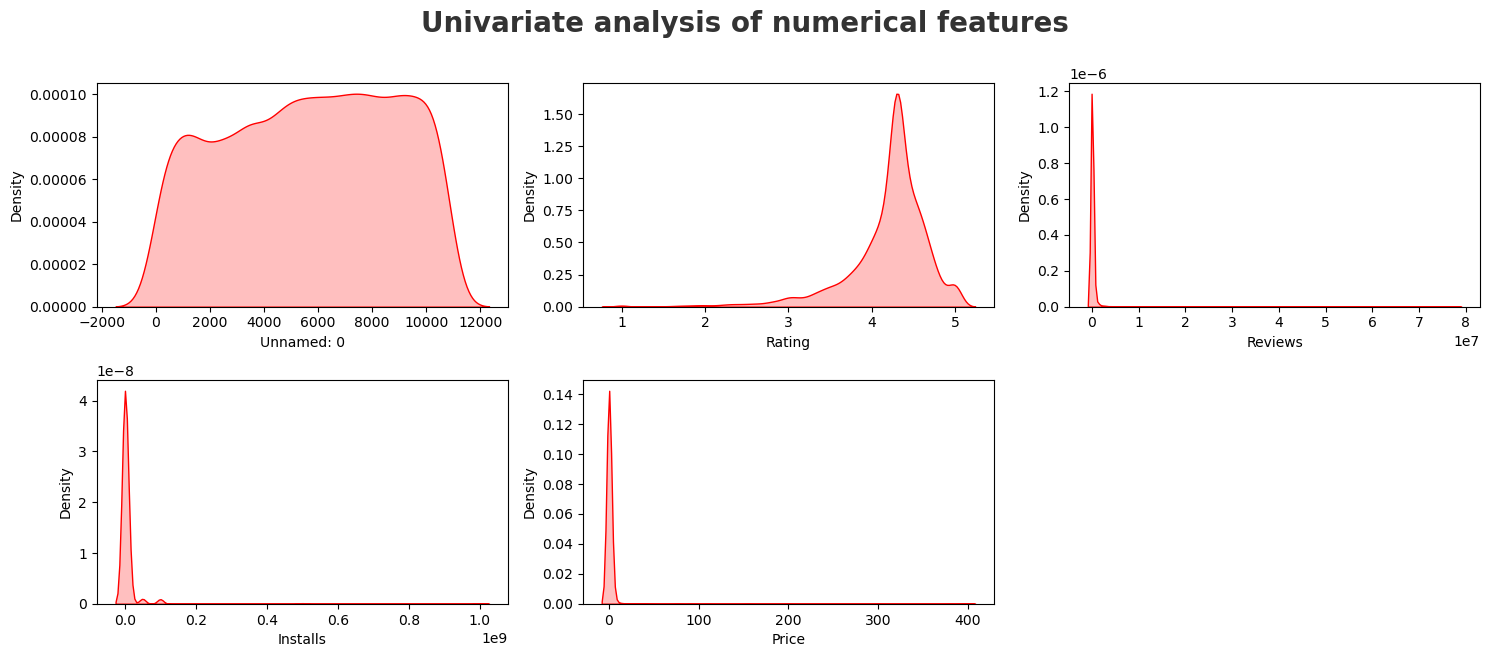

In [208]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of numerical features', fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],fill=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## -DISTRIBUTION OF APP RATING

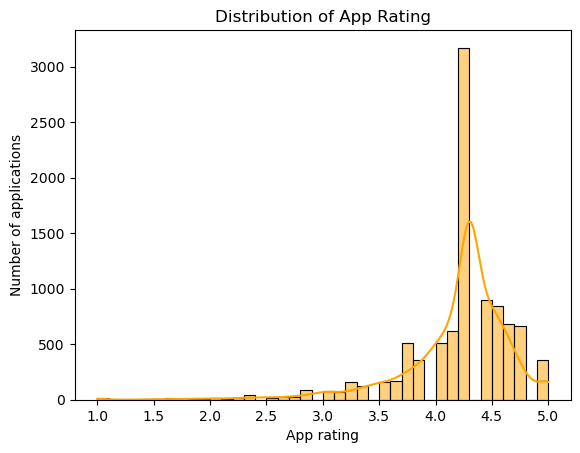

In [218]:
sns.histplot(x=df_copy['Rating'],bins=40,color='orange',kde=True)
plt.title('Distribution of App Rating')
plt.ylabel("Number of applications")
plt.xlabel("App rating")
plt.show()

## -Most common App Category

In [224]:
top_cate=df_copy['Category'].value_counts().head(5).index

In [226]:
df_copy_top_categories=df_copy[df_copy["Category"].isin(top_cate)]

In [220]:
df_copy['Category'].value_counts().head(5)

Category
FAMILY      1832
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: count, dtype: int64

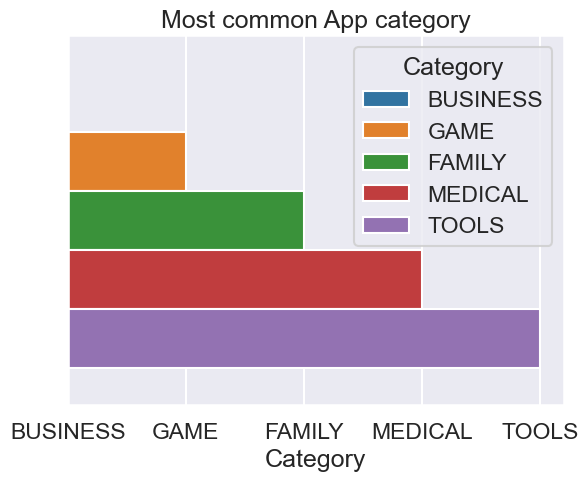

In [320]:
sns.barplot(x=df_copy_top_categories["Category"],hue=df_copy_top_categories["Category"])
plt.title("Most common App category")

plt.show()


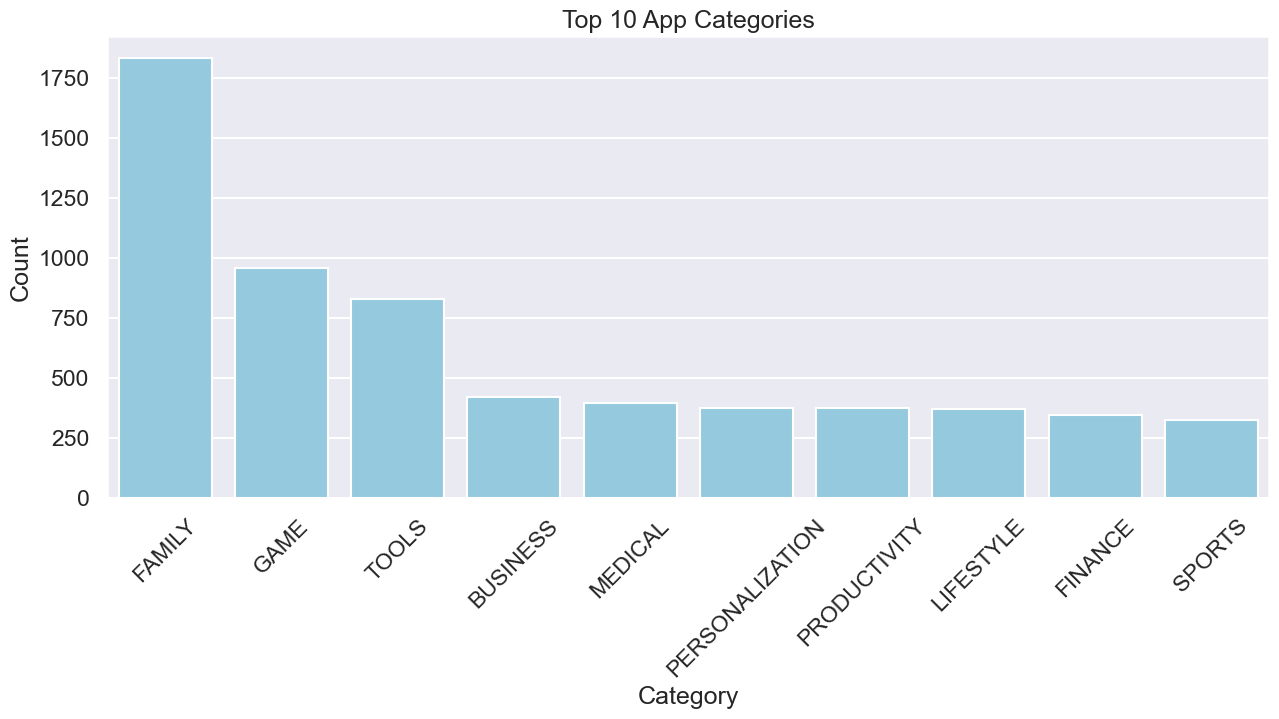

In [316]:
plt.figure(figsize=(15,6))

# Top 10 categories
top_categories = df_copy['Category'].value_counts().head(10).reset_index()
top_categories.columns = ['Category', 'Count']

sns.barplot(x='Category', y='Count', data=top_categories, color='skyblue')

plt.title('Top 10 App Categories')
plt.xticks(rotation=45)
plt.show()

## -PRICE DISTRIBUTION

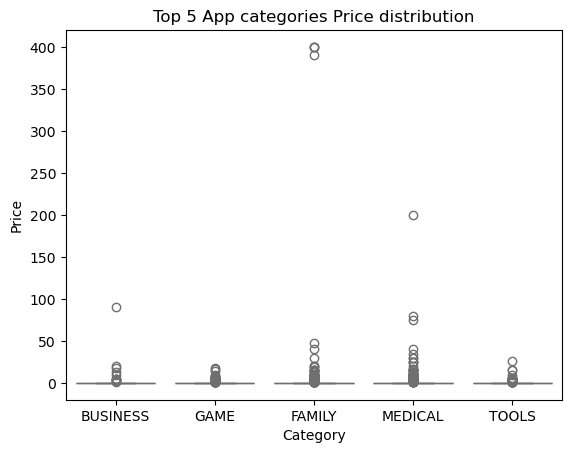

In [239]:
sns.boxplot(y=df_copy["Price"],x=df_copy_top_categories["Category"], color="skyblue")
plt.title("Top 5 App categories Price distribution")
plt.show()

## -Number of Installations

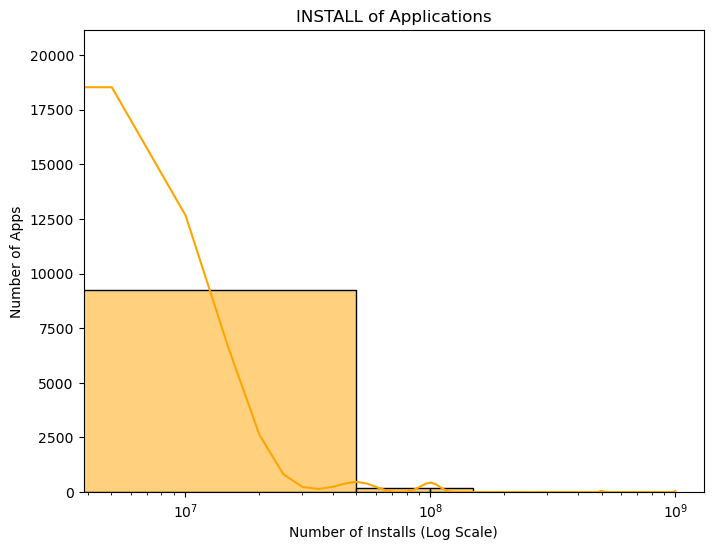

In [243]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df_copy['Installs'],bins=20,color='orange',kde=True)
plt.title('INSTALL of Applications')
plt.xscale("log")
plt.xlabel("Number of Installs (Log Scale)")
plt.ylabel("Number of Apps")
plt.show()

## -CONTENT RATING DISTRIBUTION

In [270]:
df_copy["Content Rating"].value_counts()

Content Rating
Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

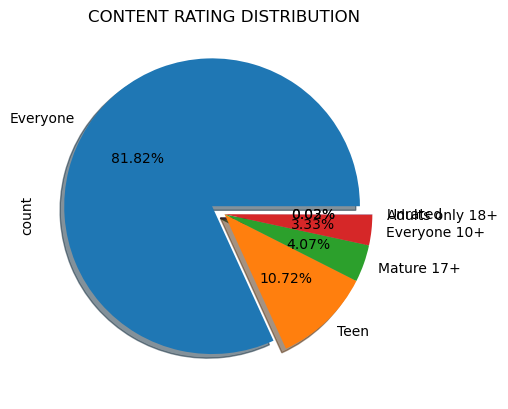

In [272]:
explode = (0.1,0,0,0,0,0)
df_copy["Content Rating"].value_counts().plot(kind="pie",autopct='%1.2f%%',explode=explode,shadow=True)
plt.title("CONTENT RATING DISTRIBUTION")

plt.show()


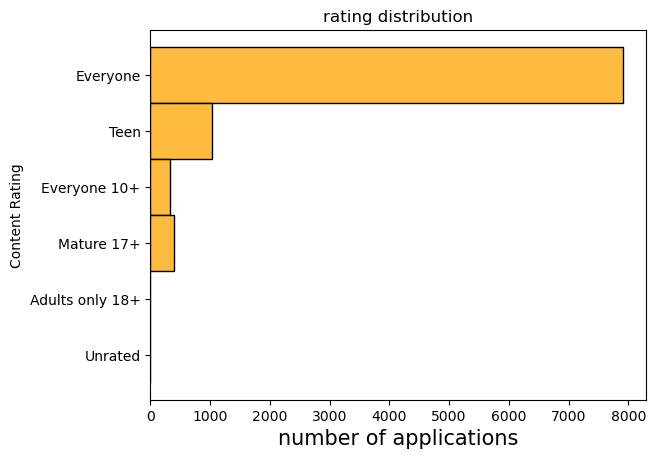

In [251]:
sns.histplot(y=df_copy['Content Rating'],bins=20,color='orange')
plt.title('rating distribution')
plt.xlabel("number of applications",fontsize=15)
plt.show()

## -Free VS Paid Applications

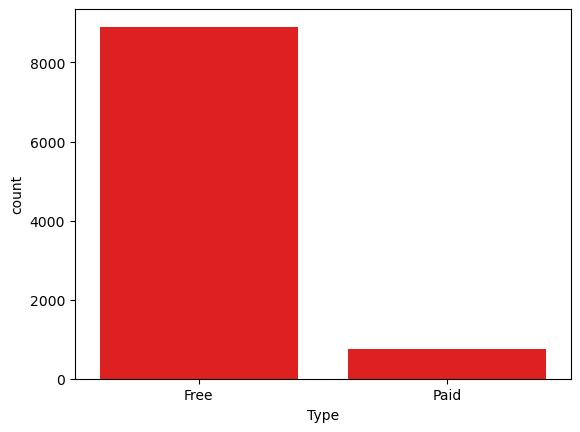

In [249]:
sns.countplot(x=df_copy["Type"],color='r')
plt.show()

## -Category having largest number of installation

Text(0.5, 1.0, 'Most popular categories in play store')

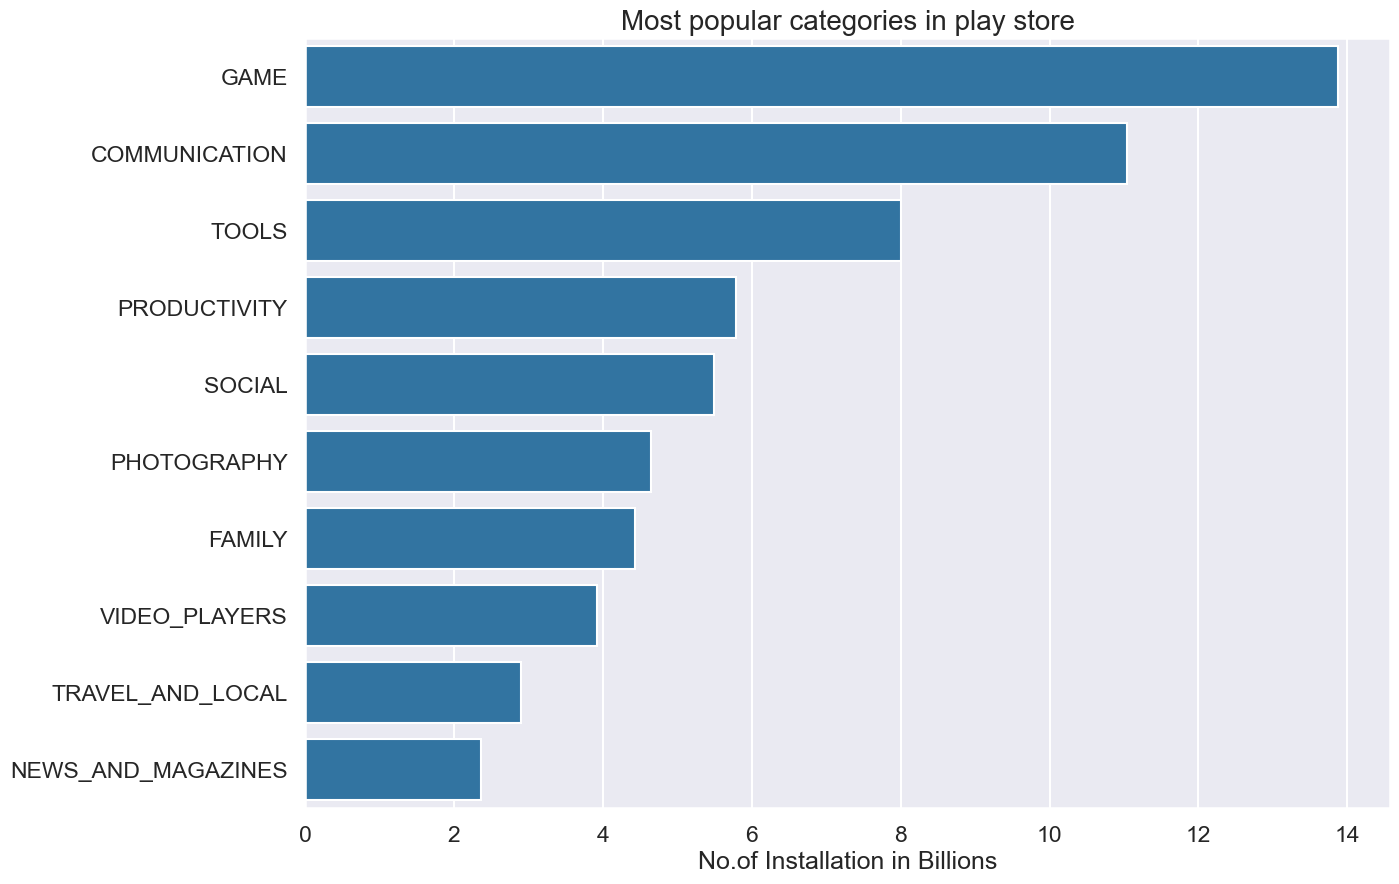

In [274]:
df_copy_cat_installs=df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_copy_cat_installs.Installs=df_copy_cat_installs.Installs/1000000000
df2=df_copy_cat_installs.head(10)
plt.figure(figsize=(14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax= sns.barplot(x='Installs',y='Category',data=df2)
ax.set_xlabel('No.of Installation in Billions')
ax.set_ylabel('')
ax.set_title("Most popular categories in play store",size=20)

## -Top Categories with Most 5★ Rated Apps

In [297]:
rating = df_copy.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()

toprating_apps = rating[rating.Rating==5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
print(toprating_apps)

Number of 5 rated apps 271
      Category  Installs                          App  Rating
0       FAMILY      1000  CS & IT Interview Questions     5.0
1        TOOLS        10                BM speed test     5.0
2        TOOLS       100                 ADS-B Driver     5.0
3    LIFESTYLE       100            AJ Men's Grooming     5.0
4    LIFESTYLE       100                  BP Log lite     5.0
..         ...       ...                          ...     ...
266     SPORTS       100         FA Player Essentials     5.0
267     SPORTS        50                    CricQuick     5.0
268       GAME        10         Trovami se ci riesci     5.0
269     SPORTS        10                    EC SPORTS     5.0
270     EVENTS       500             SUMMER SONIC app     5.0

[271 rows x 4 columns]


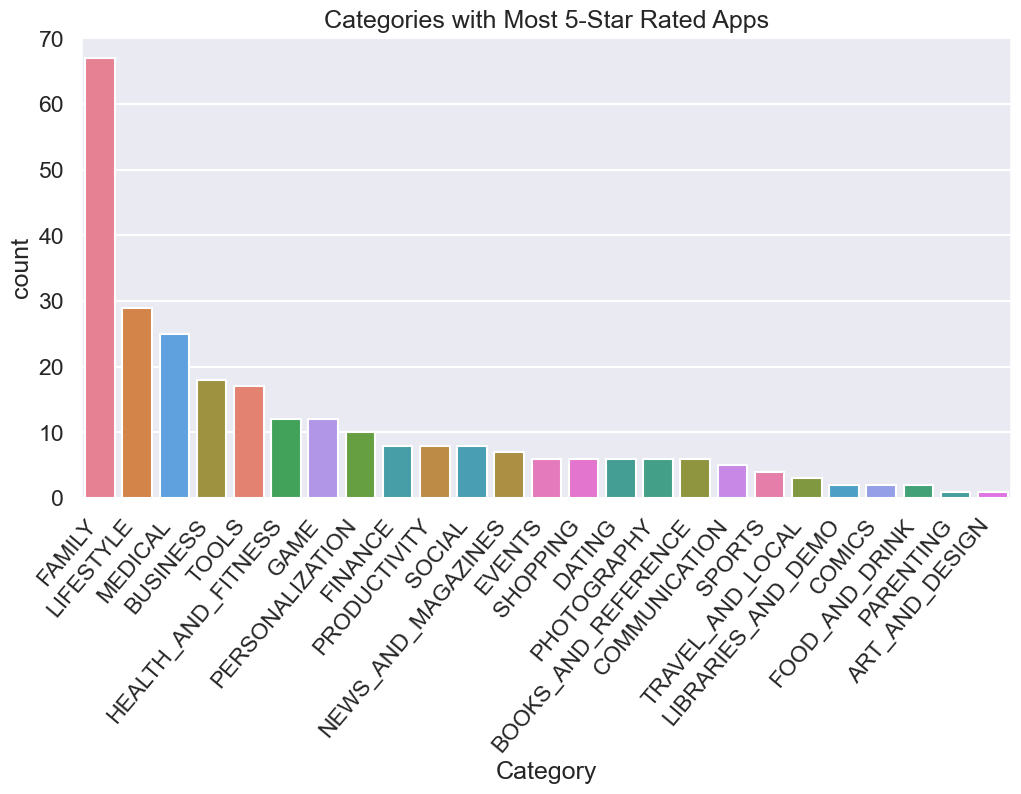

In [302]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=toprating_apps, 
    x='Category', 
    hue='Category', 
    order=toprating_apps['Category'].value_counts().index, 
    palette='husl',
    legend=False     
)
plt.title("Categories with Most 5-Star Rated Apps")
plt.xticks(rotation=50,ha="right")
plt.show()

## -User reviews vs IMDB rating

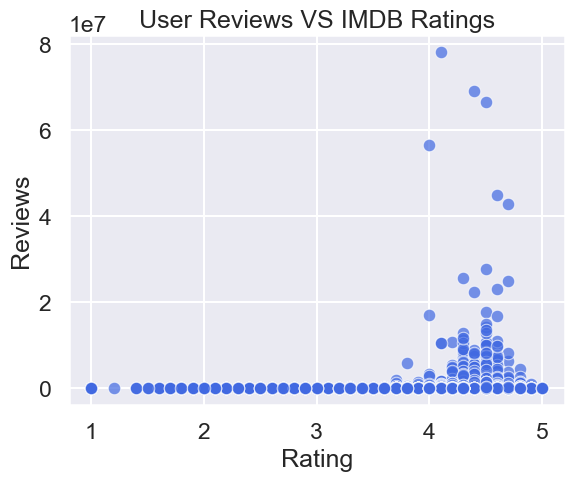

In [284]:
sns.scatterplot(y=df_copy['Reviews'],x=df_copy['Rating'],alpha=0.7,color='royalblue')
plt.title("User Reviews VS IMDB Ratings")
plt.show()

## -Scatterplot Matrix of Numerical Features

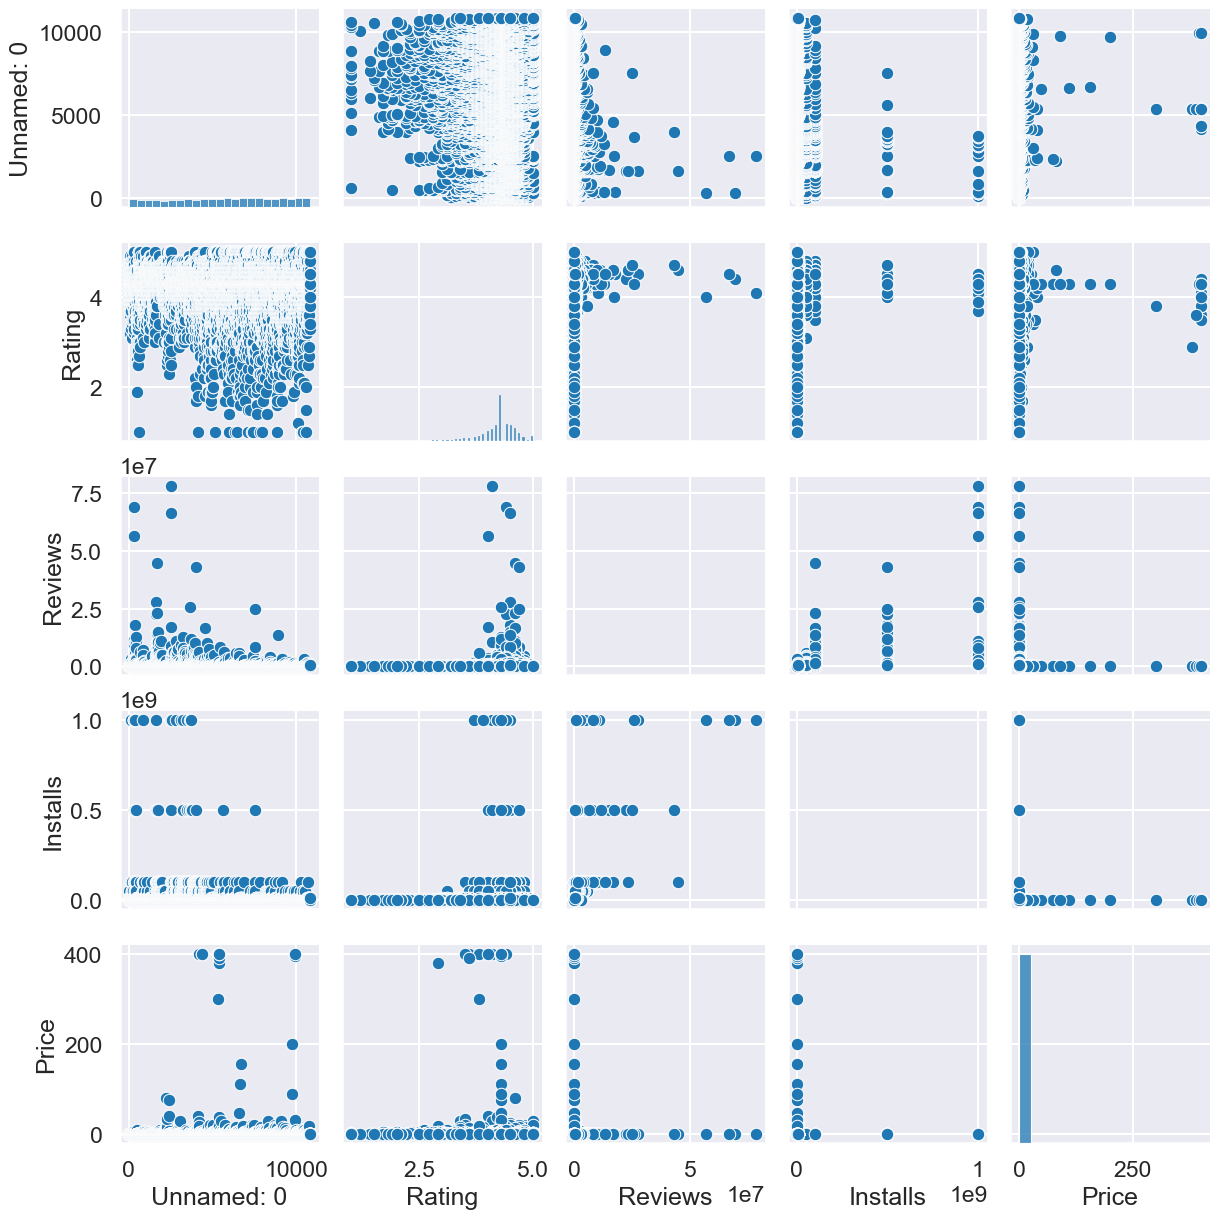

In [286]:
sns.pairplot(data = df_copy )

## -Relationship Between Installs, Ratings, Reviews, and Price

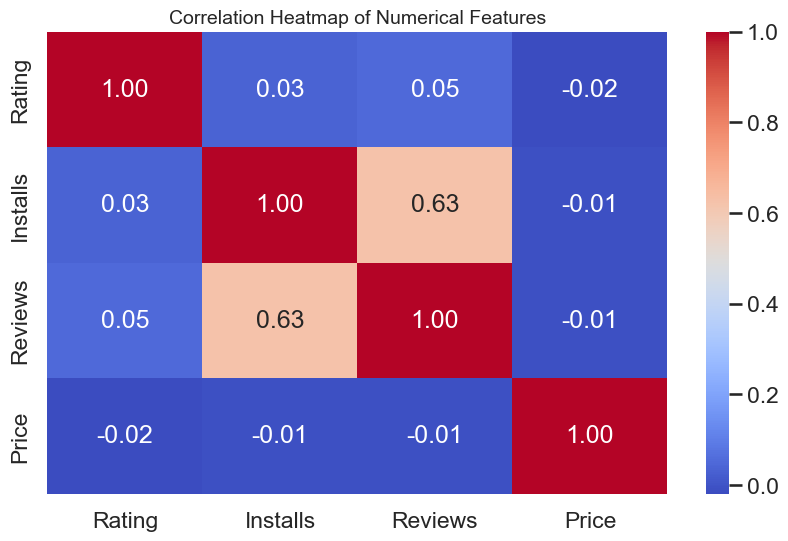

In [309]:
plt.figure(figsize=(10,6))
sns.heatmap(df_copy[['Rating','Installs','Reviews','Price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

# 5. Key Insights & Features
 -	1.	Category Popularity – Certain categories like Games, Tools, and Family dominate the Play Store, indicating strong user demand.
 -	2.	User Engagement – Apps with higher installs generally have more reviews, showing reviews as a proxy for popularity.
 - 3.	Installs Distribution - A large majority of apps have less than 10,000 installs, while only a small fraction achieve 1M+ installs, highlighting how difficult it is for apps to scale to a mass audience.
 - 4.	Pairplot- There is a strong relationship between Reviews and Installs, confirming that apps with more installs naturally attract more user feedback.
 -	5.	Pricing Trend – Most apps are free, and paid apps don’t necessarily guarantee higher ratings, reflecting user preference for free    apps.
 -	6.	Ratings Distribution – Majority of apps are rated between 4.0–4.5, but only a small portion consistently achieve the perfect 5-star rating.
 -	7.	Correlation Analysis – Reviews and Installs show a strong positive correlation, while Price has little to no relationship with ratings.


# 6. Conclusion

The analysis of the Google Play Store dataset reveals valuable insights into the app market. Free apps dominate the platform, and user engagement (installs and reviews) is a key driver of app visibility. Categories like Games and Tools continue to attract the largest user base, while apps with higher installs generally receive more reviews and slightly better ratings. Interestingly, app pricing does not strongly influence ratings, suggesting that quality and usability matter more than cost.

This project demonstrates how exploratory data analysis (EDA) and visualization can uncover meaningful patterns in real-world datasets. These findings can help developers and businesses better understand user behavior, design effective strategies, and optimize app performance on the Play Store.
